In [1]:
import numpy as np
import xarray as xr
import os
from scipy.stats import norm
from statsmodels.tsa.stattools import acf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import geopandas as gpd

import os
import numpy as np
import pandas as pd
from utils.constants import *
from utils.paths import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from utils.plotting import plot_province
import cartopy.crs as ccrs
from utils.plotting import ax_histogram
import itertools as it

def read_data(var):
    goal = pd.read_csv(os.path.join(path_out, 'regression', 'wsi_wd_test6', 'part2', 'goal_' + var + '_bc.csv'),
                       index_col = 0)

    restored = {}
    for nn in range(npcs + 1):
        restored[nn] = pd.read_csv(os.path.join(path_out, 'regression', 'wsi_wd_test6', 'part4',
                                                'restored_' + var + '_' + str(nn) + '_bc.csv'), index_col = 0)

    le = pd.read_csv(os.path.join(path_out, 'regression', 'wsi_wd_test6', 'part3', 'multivar_le.csv'),
                     parse_dates = True, index_col = 0, header = [0,1]).loc[:, (slice(None), '0')]
    le.columns = le.columns.droplevel(1)
    le = le.groupby(le.index.year, axis = 0).mean().loc[1920:, :]
    le_signs = {}
    for nn in range(npcs + 1):
        le_signs[(nn, 'positive')] = le.index[ le[str(nn)] > 0. ]
        le_signs[(nn, 'negative')] = le.index[ le[str(nn)] < 0. ]
    return goal, restored, le_signs


In [5]:
var = 'wsi'
npcs = 1

if var == 'wsi':
    goal, _, _ = read_data(var)
    levels = np.linspace(0., 1., 21)
else:
    goal, _, _ = read_data(var)
    levels = np.arange(0.01, 0.095, 0.005)


vector = goal.loc[2012, :]
cmap = 'Reds'
norm = mpl.colors.BoundaryNorm(levels, 256)
orientation = 'horizontal'

(105.0, 127.0)

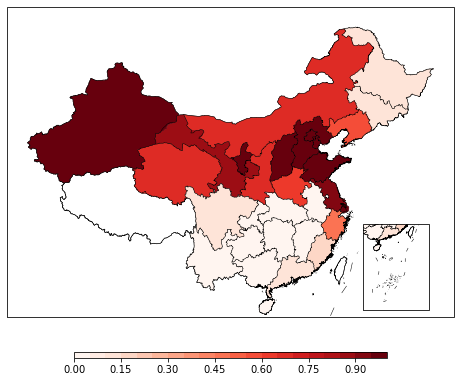

In [55]:
fig, ax = plt.subplots(figsize = (8, 8), subplot_kw = {'projection': ccrs.PlateCarree()})


df = gpd.read_file(os.path.join(path_data, 'China_Provinces', 'China-provincial_level.shp'))
df.set_index('ID', inplace = True)
df.sort_index(inplace = True)

df.plot(ax = ax, facecolor = '#FFFFFF', edgecolor = 'k', linewidths = 0.5)

df3 = gpd.read_file(os.path.join(path_data, 'China_Provinces', 'South_sea_boundry.shp'))
df3.plot(ax = ax, facecolor = 'none', edgecolor = 'k', linewidths = 0.5)

ylim0 = ax.get_ylim()
ax.set_ylim([ylim0[0] + 17, ylim0[1]])

df2 = df.loc[vector.index, :]
df2['values'] = vector.values

df2.plot(column = df2['values'], ax = ax, legend = False, cmap = cmap, norm = norm, edgecolor = 'none', linewidths = 0.5)

cbar = plt.cm.ScalarMappable(norm = norm, cmap = cmap)
plt.colorbar(cbar, ax = ax, aspect = 50, shrink = 0.7, pad = 0.08, orientation = orientation)

ax_inset = ax.get_figure().add_axes([0.55, 0.31, 0.5, 0.15], projection = ccrs.PlateCarree())
df.plot(ax = ax_inset, facecolor = '#FFFFFF', edgecolor = 'k', linewidths = 0.5)
df2.plot(column = df2['values'], ax = ax_inset, legend = False, cmap = cmap, norm = norm, edgecolor = 'none', linewidths = 0.5)
df3.plot(ax = ax_inset, facecolor = 'none', edgecolor = 'k', linewidths = 0.5)
ax_inset.set_ylim([ylim0[0], ylim0[1]-30])
ax_inset.set_xlim([105, 127])

In [60]:
ax.get_position().bounds

(0.125, 0.29864999999999997, 0.775, 0.5382583509431701)

In [61]:
dir(ax.get_position().bounds)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

(0.125, 0.29864999999999997, 0.775, 0.5382583509431701)